# DS2500 Project

By: Wynn Sheridan & Dylan Mikulka

# Cleaning The Obesity Rate Dataframe 

The goal of this section is to clean the nutrition data we got from the CDC, and only show the obesity rates for males and females. We then created a new index so that we could group both genders' data points for each state using weighted averages.

In [5]:
import pandas as pd
df = pd.read_csv("/Users/wynnsheridan/Library/CloudStorage/OneDrive-Personal/DS2500/Project1/ObesityRates.csv")
# drop unnecessary columns 
df.drop(['YearEnd','LocationDesc','Datasource','Topic','Data_Value_Unit','Data_Value_Type','GeoLocation',
         'ClassID','TopicID','QuestionID','DataValueTypeID','LocationID','Data_Value_Alt',
         'Data_Value_Footnote_Symbol','Data_Value_Footnote','Total',
         'Education','Income','Race/Ethnicity','StratificationCategory1','Stratification1','StratificationID1',
        'Age(years)','Class','Low_Confidence_Limit','High_Confidence_Limit '],axis=1, inplace=True)
# get only the rows for adults with obesity (Male & Female)
df = df.loc[(df.StratificationCategoryId1 == 'GEN')]
df = df.loc[(df.Question == 'Percent of adults aged 18 years and older who have obesity')]
# drop null values in the 'data value' column 
df.dropna(subset=['Data_Value'], inplace=True)
# create a new index that goes (1,1,2,2,3,3) so I can group males and females together with weighted averages
new_index = [(i // 2) + 1 for i in range(len(df))]
df.index = new_index
df.head()

,YearStart,LocationAbbr,Question,Data_Value,Sample_Size,Gender,StratificationCategoryId1
1,2011,AK,Percent of adults aged 18 years and older who ...,28.0,1620.0,Male,GEN
1,2011,AK,Percent of adults aged 18 years and older who ...,26.7,1716.0,Female,GEN
2,2011,AL,Percent of adults aged 18 years and older who ...,32.3,2581.0,Male,GEN
2,2011,AL,Percent of adults aged 18 years and older who ...,31.8,4723.0,Female,GEN
3,2011,AR,Percent of adults aged 18 years and older who ...,31.2,2846.0,Female,GEN


# Calculating and Implementing the Weighted Averages 

We calculated the weighted average for each state in that year, and then pivoted the table to view the graph more nicely.

In [8]:
# combine the obesity rates using the mean (will be replaced by weighted averages after)
grouped_df = df.groupby(new_index).agg({'YearStart': 'first', 'LocationAbbr': 'first', 'Data_Value': 'mean'})
grouped_df = grouped_df.rename(columns = {"YearStart": "Year", "LocationAbbr": "State", "Data_Value": "obesity_rate"})

In [9]:
# Calculate the weighted averages
weighted_avg_df = df.groupby(new_index).apply(
    # weighted sum of 'Data_Value' divided by the total 'Sample_Size' rounded to 2 decimal places
    lambda x: round((x['Data_Value'] * x['Sample_Size']).sum() / x['Sample_Size'].sum(), 2)
)
# Rename the weighted averages series for clarity
weighted_avg_df.name = 'obesity_rate'
# reset both indexes
grouped_df = grouped_df.reset_index()
weighted_avg_df = weighted_avg_df.reset_index()
# merge the weighted averages to the grouped_df
grouped_df = grouped_df.merge(weighted_avg_df, on='index', how='left')
# drop the unnessary columns 
grouped_df = grouped_df.iloc[:, 1:]  # Keep all columns starting from the third
grouped_df = grouped_df.drop(columns='obesity_rate_x')
#rename the columns 
grouped_df = grouped_df.rename(columns = {"Year": "Year", "State": "State", "obesity_rate_y": "obesity_rate"})
grouped_df.head()

,Year,State,obesity_rate
0,2011,AK,27.33
1,2011,AL,31.98
2,2011,AR,31.01
3,2011,AZ,25.24
4,2011,CA,23.91


## Pivoting the data to get a better view

In [11]:
grouped_df_pivot = grouped_df.pivot(index='Year', columns='State', values='obesity_rate')
# Convert 'Year' index to integers
grouped_df_pivot.index = grouped_df_pivot.index.astype(int)
# drop data for territories
grouped_df_pivot.drop(['GU','PR'],axis=1, inplace=True)
# get the states in alphabetical order
new_order = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA','RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'US']
# resetting the index
obesity_rate_df = grouped_df_pivot.reindex(columns=new_order)
obesity_rate_df

State,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,US
Year,,,,,,,,,,,,,,,,,,,,,
2011,31.98,27.33,25.24,31.01,23.91,20.65,24.32,28.76,24.55,26.46,...,29.63,30.29,24.22,25.14,29.06,26.16,32.76,27.49,24.78,27.39
2012,33.30,25.64,25.94,34.67,24.85,20.39,25.40,27.08,22.37,24.97,...,31.28,29.36,24.27,23.60,27.41,26.74,33.71,29.71,25.02,27.65
2013,32.92,28.31,26.84,34.53,24.01,21.35,24.87,31.13,23.15,26.19,...,33.92,31.10,24.12,24.63,27.21,27.22,35.12,29.61,27.73,28.30
2014,33.34,29.78,28.93,35.92,24.71,21.24,26.23,30.84,21.98,26.27,...,31.07,31.76,25.75,24.71,28.60,27.10,35.69,31.10,29.41,28.89
2015,35.80,29.93,28.17,34.36,24.15,20.20,25.10,29.79,22.82,26.68,...,33.93,32.52,24.44,25.18,29.31,26.36,35.49,30.61,28.81,28.82
2016,35.62,31.27,28.84,36.52,25.05,22.30,25.85,30.70,23.06,27.35,...,34.70,33.83,25.34,26.99,29.05,28.55,37.63,30.66,27.65,29.55
2017,36.44,34.38,29.41,35.67,25.14,22.69,26.64,31.76,23.26,28.35,...,32.81,32.87,25.20,27.58,30.20,27.63,37.91,31.98,28.77,30.09
2018,36.43,29.22,29.42,37.67,25.81,23.00,27.33,33.55,24.86,30.62,...,34.46,34.95,27.78,27.43,30.29,28.68,39.44,32.07,28.91,30.97
2019,36.12,30.55,31.44,37.68,26.08,23.75,29.06,34.40,24.02,27.06,...,36.50,34.09,29.21,26.59,32.06,28.35,39.75,34.32,29.51,31.39


In [12]:
obesity_years = obesity_rate_df.index

# Cleaning and Pivoting Death Rate Dataframe

In [14]:
df = pd.read_csv("/Users/wynnsheridan/Library/CloudStorage/OneDrive-Personal/DS2500/Project1/CausesOfDeath.csv")
# drop unnecessary columns
df.drop(['113 Cause Name'],axis=1, inplace=True)
# rename the columns 
df = df.rename(columns = {"Year": "Year", "Cause Name": "Cause_of_Death", "State": "State", "Deaths": "Deaths", "Age-adjusted Death Rate": "Death Rate"})
# get only the heart disease data
df = df.loc[(df.Cause_of_Death == 'Heart disease')]
# pivot the table
df_pivot = df.pivot(index='Year', columns='State', values='Death Rate')
# Convert 'Year' index to integers
df_pivot.index = df_pivot.index.astype(int)
# get the columns in the right order
new_order = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'United States']

# correct names for the columns to be 
new_columns = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'US']
# get the columns in the right order
df_pivot = df_pivot.reindex(columns=new_order)
# Set new column names to abbreviations using set_axis
death_rate_df = df_pivot.set_axis(new_columns, axis=1)
death_rate_df

,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,TN,TX,UT,VT,VA,WA,WV,WI,WY,US
Year,,,,,,,,,,,,,,,,,,,,,
1999,303.0,198.0,223.1,287.8,257.3,196.3,238.8,269.2,296.2,247.7,...,299.0,270.1,190.1,217.4,250.9,215.7,325.5,243.7,227.8,266.5
2000,299.5,211.7,214.0,283.8,239.9,185.3,232.7,262.5,310.6,238.6,...,293.6,263.5,194.0,229.4,245.5,209.7,305.0,237.3,217.4,257.6
2001,292.7,189.1,207.3,281.8,233.6,183.3,218.0,261.2,312.8,236.0,...,280.6,259.1,187.7,224.1,234.5,203.3,298.8,224.3,211.9,249.5
2002,291.3,169.3,207.9,282.8,230.4,182.7,219.3,239.9,296.6,226.1,...,287.3,256.3,188.6,212.0,230.0,196.4,291.2,218.8,214.5,244.6
2003,288.5,185.5,202.2,262.5,225.1,180.3,204.1,247.2,291.9,217.3,...,277.6,241.2,187.4,204.1,222.1,192.8,288.1,207.9,202.1,236.3
2004,278.1,160.1,190.0,252.1,209.0,163.6,189.5,238.1,276.4,208.7,...,258.6,226.9,178.1,192.3,210.4,179.3,263.6,195.4,192.5,221.6
2005,274.5,166.1,189.8,250.3,203.0,164.8,180.7,232.3,270.3,200.0,...,251.2,220.4,167.9,180.5,203.0,180.5,253.6,190.6,188.3,216.8
2006,263.0,170.6,176.5,240.5,198.8,152.7,174.7,206.0,280.9,187.9,...,238.0,205.2,163.7,177.2,195.2,168.4,240.5,181.1,192.9,205.5
2007,245.0,154.2,166.0,230.1,183.9,147.0,167.4,205.1,253.6,175.8,...,227.2,200.1,161.0,162.4,186.7,170.1,232.5,172.7,180.4,196.1


In [15]:
death_rate_years = death_rate_df.index

## Looking at the variables over time

graph showing US average obesity rate from the years 2011-2023, we can see by looking at the graph that obesity rate in America is steadily increasing.

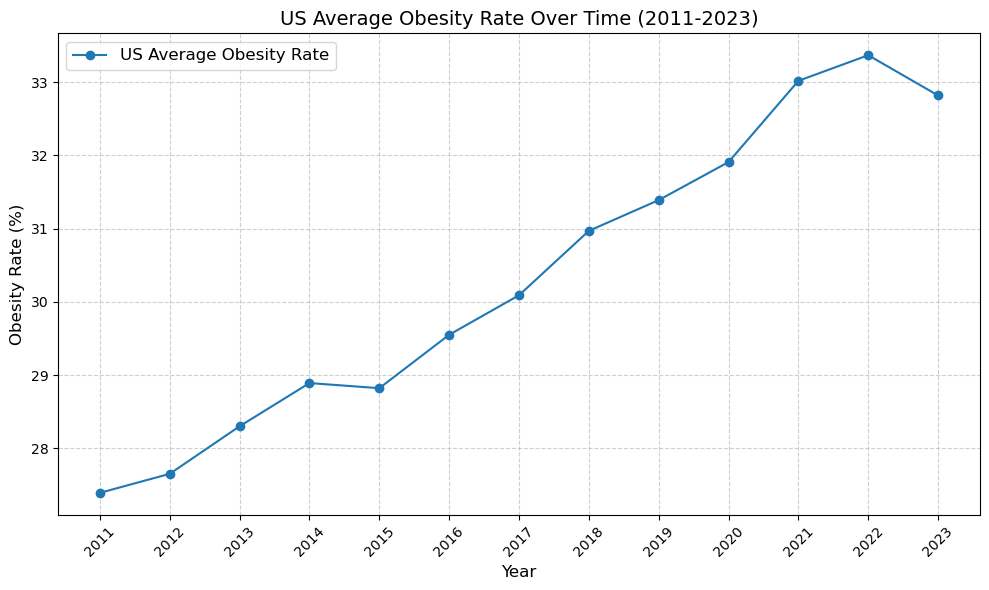

In [18]:
import matplotlib.pyplot as plt
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(obesity_years, obesity_rate_df["US"], marker="o", label="US Average Obesity Rate")
plt.title("US Average Obesity Rate Over Time (2011-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Obesity Rate (%)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.xticks(obesity_years, rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Graph showing US heart disease death rate over time, we can see that heart disease is declining over time, due to more modern medicine and easier access to healthcare.

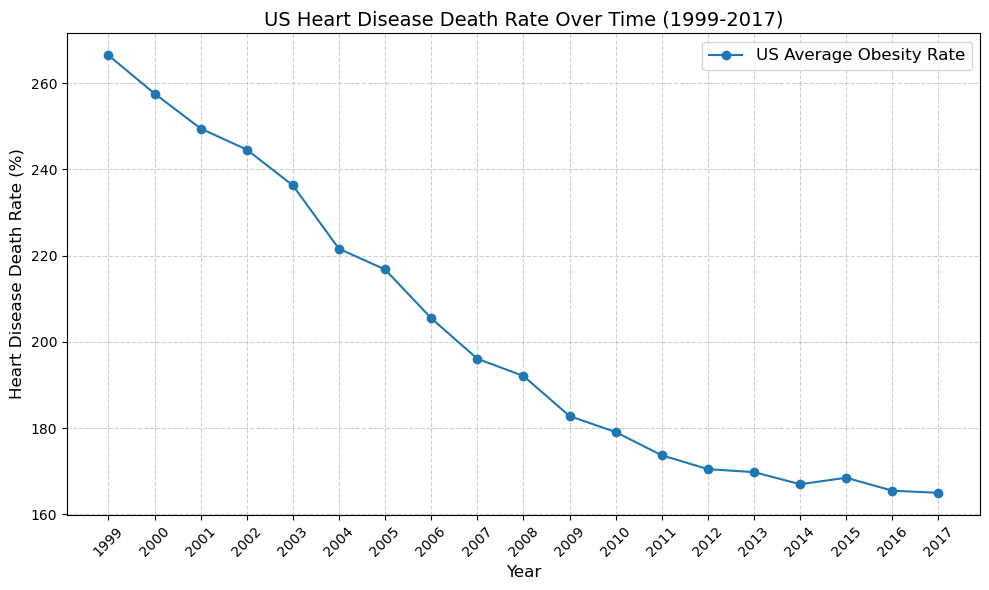

In [20]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(death_rate_years, death_rate_df["US"], marker="o", label="US Average Obesity Rate")
plt.title("US Heart Disease Death Rate Over Time (1999-2017)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Heart Disease Death Rate (%)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.xticks(death_rate_years, rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Looking at the data on a temporal scale, it is evident that our data is not correlated over time. However, this does not mean the end of our investigation. We want to shift our focus to trying to answer the question: Do higher obesity rates lead to higher rates of heart disease deaths? We also want to answer the question, are rates significantly higher in different regions of the US? and also, are there any other factors that are leading to obesity?

# Combining both Pivot Dataframes for graphing 

In this section we will melt the pivot tables into their original list like format and combine them so we have death rate and obesity rate as seperate columns for each year and state. We will use the data from 2011-2017, because that those are the years where our dataframes line up.

### Melting the Death Rate Dataframe

In [25]:
# reset the index for the death rate dataframe
death_rate_df = death_rate_df.reset_index().rename(columns={'index': 'Year'})
# melted death rate dataframe
death_rate_df_melted = death_rate_df.melt(id_vars='Year', var_name='State', value_name='Death Rate')
# rename the dataframe
death_rate = death_rate_df_melted[death_rate_df_melted['Year'] > 1998]
# get the data from 2011 to most recent 
death_rate = death_rate.loc[(death_rate.Year >= 2011)]

### Same process for obesity rate

In [27]:
obesity_rate_df = obesity_rate_df.reset_index().rename(columns={'index': 'Year'})
obesity_rate = obesity_rate_df.melt(id_vars='Year', var_name='State', value_name='Obesity Rate')
# get the correct timeframe
obesity_rate_1 = obesity_rate.loc[(obesity_rate.Year <= 2017)]

## Combining both Dataframes

In [29]:
combined_df = pd.merge(death_rate, obesity_rate_1, on=['Year', 'State'])
combined_df.head()

,Year,State,Death Rate,Obesity Rate
0,2011,AL,228.7,31.98
1,2012,AL,225.1,33.30
2,2013,AL,228.4,32.92
3,2014,AL,224.0,33.34
4,2015,AL,229.7,35.80


# Graphing Obesity Rate Vs. Heart Disease Death Rate

### Get a raw view of the scatter plot

<Axes: xlabel='Death Rate', ylabel='Obesity Rate'>

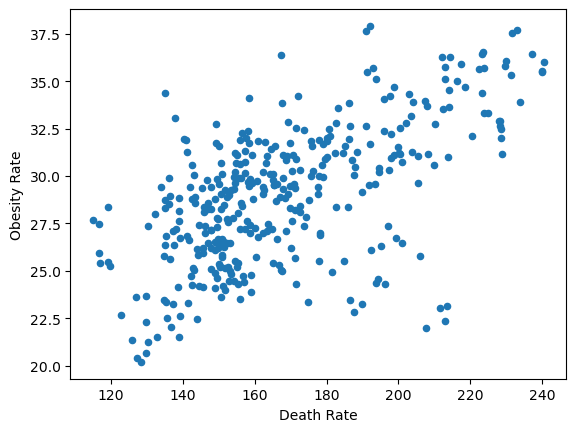

In [32]:
combined_df.plot.scatter(x='Death Rate', y='Obesity Rate')

Now, we are going to create the same scatterplot as above, except this time we are going to have different colored datapoints depending on what region that state is in. We did this to see if states from certain regions have similar data, and to see what regions have the highest obesity rate/heart disease death rate.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def regional_plot(df,x_var,x_label,y_label,title):
    '''
    This function creates a regional scatterplot with obesity rate as the dependent variable, 
    the user can input what they want to compare obesity with
    '''
    # define regions by listing states
    northeast = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
    midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
    south = ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV','DE','DC']
    west = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
    usa = ['US']
    # combine lists into a dictionary comprehension
    state_to_region = {state: 'Northeast' for state in northeast}
    state_to_region.update({state: 'Midwest' for state in midwest})
    state_to_region.update({state: 'South' for state in south})
    state_to_region.update({state: 'West' for state in west})
    state_to_region.update({state: 'USA Mean' for state in usa})
    
    # create a region column that bases it's choice off of the regions we denoted
    df['Region'] = df['State'].map(state_to_region)
    
    # Define colors for each region
    region_colors = {
        'Northeast': 'blue',
        'Midwest': 'limegreen',
        'South': 'red',
        'West': 'magenta',
        'USA Mean': 'black'  # if applicable
    }
    # Map the 'Region' column to colors
    df['Color'] = df['Region'].map(region_colors)
    
    plt.figure(figsize=(12, 8))  
    sns.scatterplot(
        x=df[x_var], 
        y=df['Obesity Rate'],
        # automatically color by 'Color' column
        c=df['Color'],  
        marker='o', 
        alpha=0.7,
        s=100
    )
    # Regression line without point markers, with a single color
    sns.regplot(x=df[x_var], y=df['Obesity Rate'], scatter=False, color='navy') 
    
    # optional: add a legend
    for region, color in region_colors.items():
        plt.scatter([], [], color=color, label=region)
    plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left') 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
        

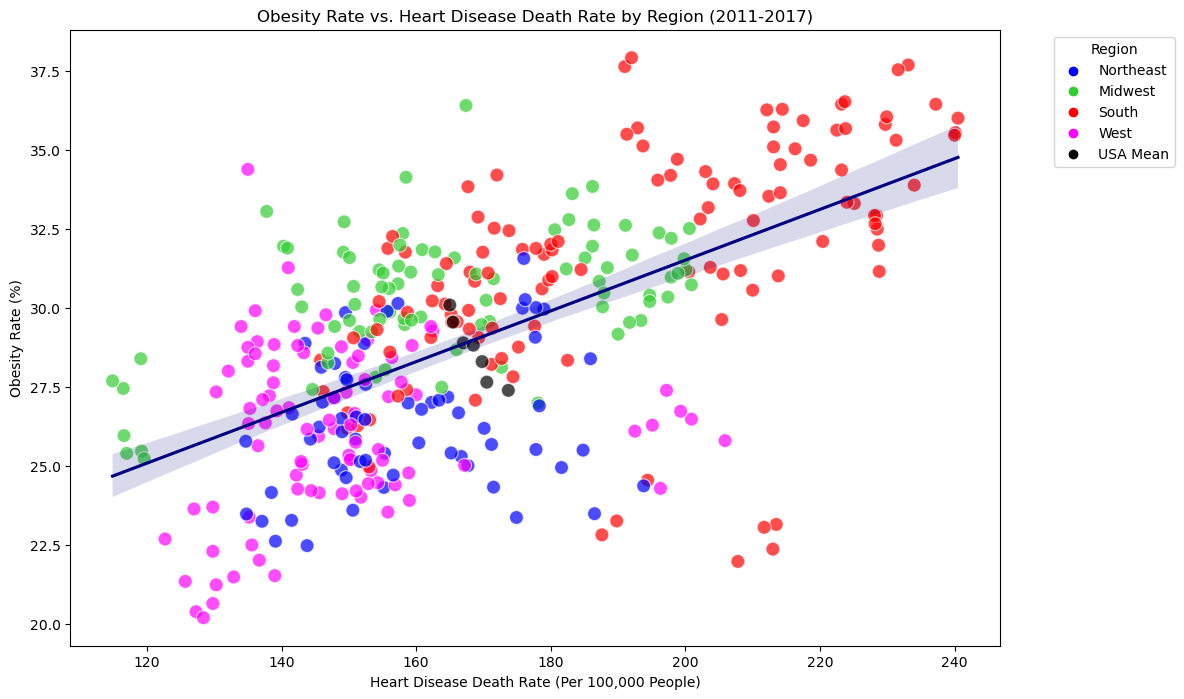

In [35]:
regional_plot(combined_df,'Death Rate', 'Heart Disease Death Rate (Per 100,000 People)','Obesity Rate (%)','Obesity Rate vs. Heart Disease Death Rate by Region (2011-2017)')

## R-Value Calculation

In [37]:
import statistics
r = statistics.correlation(combined_df['Death Rate'],combined_df['Obesity Rate'])
r

0.6084426193798949

# Predicting Death Rates using Linear Regression

### Mean Squared Error Function (ppp_3)

In [40]:
import statistics
def mean_squared_error(lst, predicted_lst):
    mean_sq_error = statistics.mean((y - x) ** 2 for x, y in zip(lst, predicted_lst))
    return mean_sq_error

Now, we will perfrom Linear Regression on the data we have from 2011-2017 to predict the death rates for 2018-2023

In [42]:
from sklearn.linear_model import LinearRegression
# Rename columns in `combined_df` for clarity and consistency
training_data = combined_df.rename(columns = {"Year": "Year", "State": "State", "Death Rate_x": "Death Rate", "Death Rate_y": "Obesity Rate"})
# Filter `obesity_rate` DataFrame to include only rows where the year is greater than 2017
predict_data = obesity_rate.loc[(obesity_rate.Year > 2017)]
# Rename columns in `predict_data` for consistency
predict_data = predict_data.rename(columns = {"Year": "Year", "State": "State", "Death Rate": "Obesity Rate"})
# Create a new DataFrame `predictions_df` with only 'State' and 'Year' columns from `predict_data`
predictions_df = predict_data[['State', 'Year']].copy()
# set the predicted death rates to be an empty array
predictions_df['Predicted Death Rate'] = np.nan

# set the states to be only the unique values
states = training_data["State"].unique()
for state in states:
    # Filter data for the specific state
    state_train_data = training_data[training_data['State'] == state]
    state_predict_data = predict_data[predict_data['State'] == state]
    
    # Prepare features and target
    X_train = state_train_data[['Year', 'Obesity Rate']]
    y_train = state_train_data['Death Rate']
    X_predict = state_predict_data[['Year', 'Obesity Rate']]
    # Check if there are any missing (null) values in the 'Obesity Rate' column of the X_predict DataFrame
    if X_predict['Obesity Rate'].isnull().any():
        # Forward fill missing values in the 'Obesity Rate' column, 
        # replacing each NaN with the previous non-null value in the column
        X_predict.loc[:, 'Obesity Rate'] = X_predict['Obesity Rate'].ffill()

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions for 2018-2023 and store in predictions_df
    predictions = model.predict(X_predict)
    predictions_df.loc[predictions_df['State'] == state, 'Predicted Death Rate'] = predictions

# Calculate mean squared error for the training data to evaluate the model
for state in states:
    state_train_data = training_data[training_data['State'] == state]
    X_train = state_train_data[['Year', 'Obesity Rate']]
    y_train = state_train_data['Death Rate']
    model = LinearRegression().fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    #print(f'{state} - Training MSE: {mse:.2f}')

# Display the predictions for 2018-2023
predictions_df

,State,Year,Predicted Death Rate
7,AL,2018,221.821909
8,AL,2019,219.406519
9,AL,2020,222.419970
10,AL,2021,221.936609
11,AL,2022,217.589191
...,...,...,...
671,US,2019,160.318677
672,US,2020,158.743365
673,US,2021,155.318448
674,US,2022,154.276073


## Dataframe for predicted Death Rates (2018-2023)

In [44]:
# get only the obesity rates from 2018 onwards
obesity_add = obesity_rate.loc[obesity_rate.Year > 2017]
# merge the obesity rates with the predictions
comb_df = pd.merge(predictions_df, obesity_add, on=['Year', 'State'])
comb_df = comb_df.rename(columns = {"Year": "Year", "State": "State", "Predicted Death Rate": "Death Rate", "Death Rate": "Obesity Rate"})
# add columns for the Region and color
# define regions by listing states
northeast = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
south = ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV','DE','DC']
west = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
usa = ['US']
# combine lists into a dictionary comprehension
state_to_region = {state: 'Northeast' for state in northeast}
state_to_region.update({state: 'Midwest' for state in midwest})
state_to_region.update({state: 'South' for state in south})
state_to_region.update({state: 'West' for state in west})
state_to_region.update({state: 'USA Mean' for state in usa})
# Define colors for each region
region_colors = {
    'Northeast': 'blue',
    'Midwest': 'limegreen',
    'South': 'red',
    'West': 'magenta',
    'USA Mean': 'black'  # if applicable
}
comb_df['Region'] = comb_df['State'].map(state_to_region)
comb_df['Color'] = comb_df['Region'].map(region_colors)
comb_df.head()

,State,Year,Death Rate,Obesity Rate,Region,Color
0,AL,2018,221.821909,36.43,South,red
1,AL,2019,219.406519,36.12,South,red
2,AL,2020,222.419970,39.21,South,red
3,AL,2021,221.936609,40.11,South,red
4,AL,2022,217.589191,38.59,South,red


## Create the master dataframe

In [46]:
# put the predicted data on top of the combined_df
big_df = pd.concat([combined_df, comb_df], ignore_index=True)
big_df.head()

,Year,State,Death Rate,Obesity Rate,Region,Color
0,2011,AL,228.7,31.98,South,red
1,2012,AL,225.1,33.30,South,red
2,2013,AL,228.4,32.92,South,red
3,2014,AL,224.0,33.34,South,red
4,2015,AL,229.7,35.80,South,red


Denote predicted data and actual data separately for graphing the predicted values against the existing

In [48]:
predicted_data = big_df.loc[big_df.Year > 2017]
actual_data = big_df.loc[big_df.Year <= 2017]

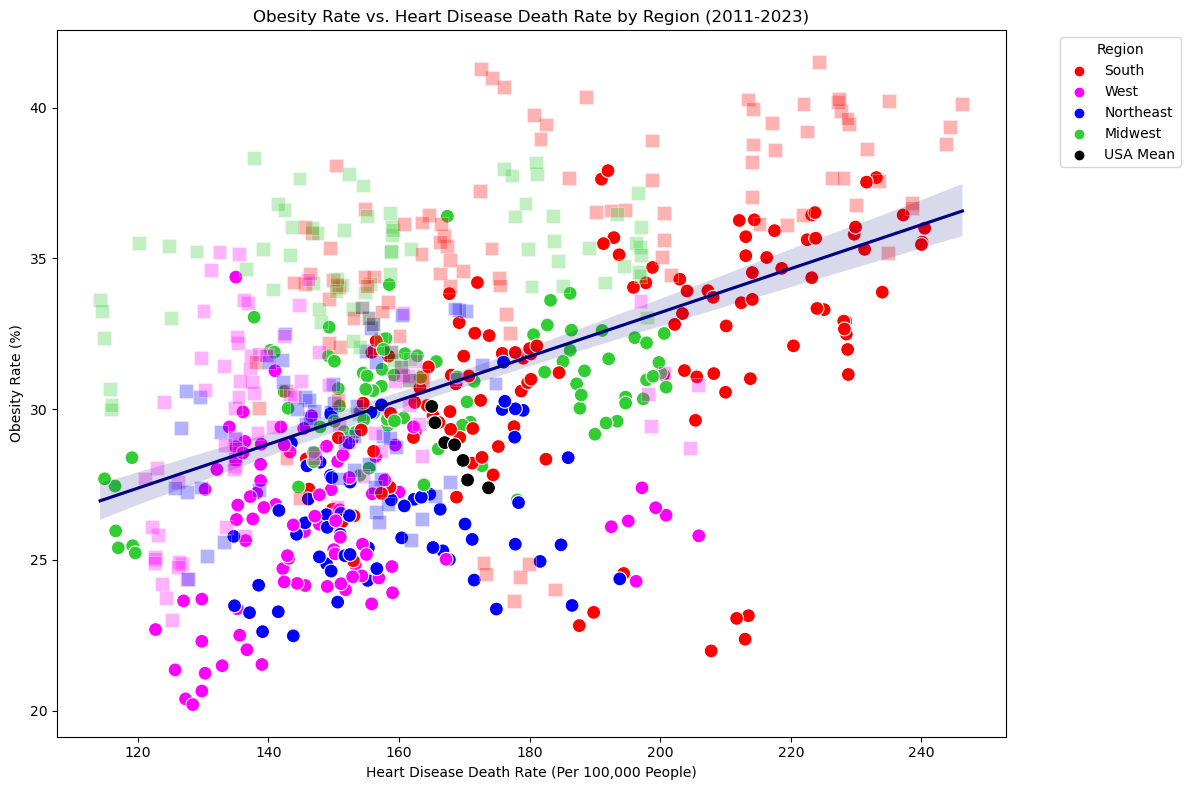

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

northeast = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
south = ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV', 'DE', 'DC']
west = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']
usa = ['US']

# Combine lists into a dictionary comprehension
state_to_region = {state: 'Northeast' for state in northeast}
state_to_region.update({state: 'Midwest' for state in midwest})
state_to_region.update({state: 'South' for state in south})
state_to_region.update({state: 'West' for state in west})
state_to_region.update({state: 'USA Mean' for state in usa})

big_df['Region'] = big_df['State'].map(state_to_region)

# define colors for each region
region_colors = {
    'Northeast': 'blue',
    'Midwest': 'limegreen',
    'South': 'red',
    'West': 'magenta',
    'USA Mean': 'black'  
}

# Map the 'Region' column to colors
big_df['Color'] = big_df['Region'].map(region_colors)

# Plot actual values 
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=actual_data,
    x=actual_data['Death Rate'],
    y=actual_data['Obesity Rate'],
    hue=actual_data['Region'],  
    palette=region_colors,  
    marker='o',
    alpha=1,
    s=100
)

# Plot predicted values
sns.scatterplot(
    data=predicted_data,  
    x=predicted_data['Death Rate'],
    y=predicted_data['Obesity Rate'],
    hue='Region',  
    palette=region_colors,
    # square marker for predicted values
    marker='s',  
    alpha=0.3,
    s=100,
    # dont add to legend
    legend=False  
)
# Add a regression line
sns.regplot(x=big_df['Death Rate'], y=big_df['Obesity Rate'], scatter=False, color='navy')

# Customize the legend
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

# Set labels and title
plt.xlabel('Heart Disease Death Rate (Per 100,000 People)')
plt.ylabel('Obesity Rate (%)')
plt.title('Obesity Rate vs. Heart Disease Death Rate by Region (2011-2023)')
# Show plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

Looking at the graph above, the faded squares represent the predicted death rates. We can clearly see that our model is predicting obesity rates to rise significantly in the future. 

## Seeing if there exists a correlation between Poverty Rate and Obesity Rate

We use the same techniques exhibited in the code above to clean and organize the poverty rate data to be displayed against the obesity rate data that we have.

In [53]:
poverty_df = pd.read_csv("/Users/wynnsheridan/Library/CloudStorage/OneDrive-Personal/DS2500/Project1/poverty.csv")
# get the melted poverty rate dataframe
poverty_df_melted = poverty_df.melt(id_vars='Year', var_name='State', value_name='Poverty Rate')
obesity_df = obesity_rate_1.rename(columns = {"Year": "Year", "State": "State", "Death Rate": "Obesity Rate"})
# get the overlapping data from each dataframe (2011-2017)
poverty_df_1 = poverty_df_melted.loc[poverty_df_melted.Year < 2018]
final_poverty_df = poverty_df_1.loc[poverty_df_1.Year > 2010]
final_obesity_df = obesity_df.loc[:660]
# merge the dataframes 
poverty_vs_obesity_df = pd.merge(final_poverty_df, final_obesity_df, on=['Year', 'State'])
poverty_vs_obesity_df.head()

,Year,State,Poverty Rate,Obesity Rate
0,2011,AL,19.1,31.98
1,2012,AL,19.0,33.30
2,2013,AL,18.9,32.92
3,2014,AL,19.2,33.34
4,2015,AL,18.5,35.80


Use the same function as heart disease graph to view poverty rate vs. obesity rate

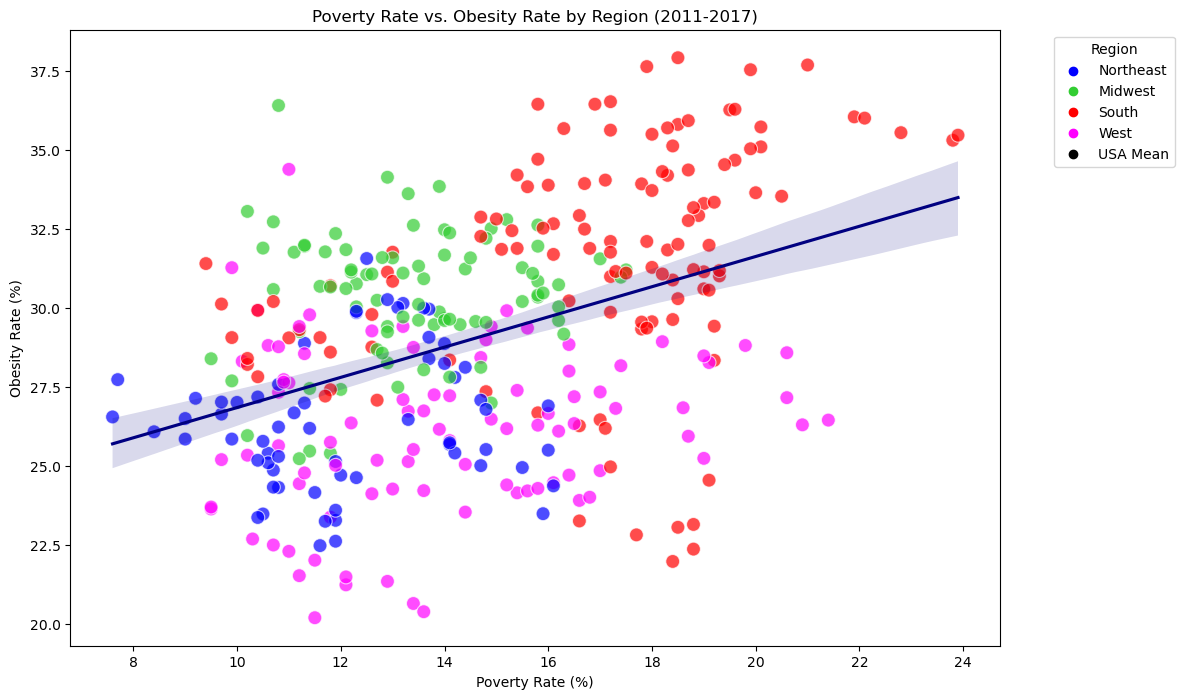

In [55]:
regional_plot(poverty_vs_obesity_df,'Poverty Rate', 'Poverty Rate (%)', 'Obesity Rate (%)', 'Poverty Rate vs. Obesity Rate by Region (2011-2017)')

In [56]:
import statistics
r = statistics.correlation(poverty_vs_obesity_df['Poverty Rate'],poverty_vs_obesity_df['Obesity Rate'])
r

0.4133583954970769

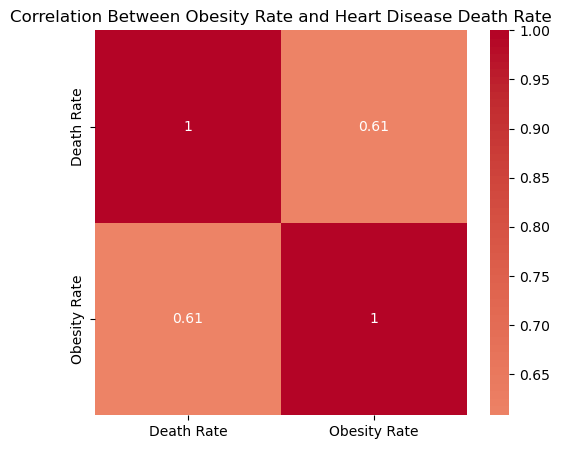

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Sample data structure for demonstration (replace with actual data)
# Assuming combined_df has 'State', 'Death Rate', and 'Obesity Rate' columns
# Calculate the correlation matrix for 'Death Rate' and 'Obesity Rate'
correlation_matrix = combined_df[['Death Rate', 'Obesity Rate']].corr()
# Plot the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Obesity Rate and Heart Disease Death Rate")
plt.show()